# Document

DATA API = https://covidtracking.com/data/api/

REST API URL = https://api.covidtracking.com/v1/us/daily.json


---

### Importing library

In [562]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
import matplotlib.pyplot as plt

### Exploring and Wrangling data 

In [563]:
url = 'https://api.covidtracking.com/v1/us/daily.json'
r = requests.get(url)
j = r.json()
j

[{'date': 20210307,
  'states': 56,
  'positive': 28756489,
  'negative': 74582825,
  'pending': 11808,
  'hospitalizedCurrently': 40199,
  'hospitalizedCumulative': 776361,
  'inIcuCurrently': 8134,
  'inIcuCumulative': 45475,
  'onVentilatorCurrently': 2802,
  'onVentilatorCumulative': 4281,
  'dateChecked': '2021-03-07T24:00:00Z',
  'death': 515151,
  'hospitalized': 776361,
  'totalTestResults': 363825123,
  'lastModified': '2021-03-07T24:00:00Z',
  'recovered': None,
  'total': 0,
  'posNeg': 0,
  'deathIncrease': 842,
  'hospitalizedIncrease': 726,
  'negativeIncrease': 131835,
  'positiveIncrease': 41835,
  'totalTestResultsIncrease': 1170059,
  'hash': 'a80d0063822e251249fd9a44730c49cb23defd83'},
 {'date': 20210306,
  'states': 56,
  'positive': 28714654,
  'negative': 74450990,
  'pending': 11783,
  'hospitalizedCurrently': 41401,
  'hospitalizedCumulative': 775635,
  'inIcuCurrently': 8409,
  'inIcuCumulative': 45453,
  'onVentilatorCurrently': 2811,
  'onVentilatorCumulative

In [564]:
df = pd.DataFrame(j)
covidtotals = df[::-1]
covidtotals

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
419,20200113,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-13T24:00:00Z,None,0,0,0,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff
418,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,None,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8
417,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,None,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
416,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,None,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
415,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,None,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0


Coverting data in date column from 20200113 to 2020-01-13 which is easier to understand 

In [565]:
x = str(covidtotals.date.values).split()
x[0] = x[0][1:]
x[-1] = x[-1][:-1]

new=[]
for i in range(len(x)):
    c=0
    k=''        
    for j in range(len(x[i])):
        
        if c==4 or c==6:
            k+='-'
        k+= x[i][j]
        c+=1
    new.append(k)


In [566]:
covidtotals["date"] = new
covidtotals

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
419,2020-01-13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-13T24:00:00Z,None,0,0,0,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff
418,2020-01-14,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,None,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8
417,2020-01-15,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,None,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
416,2020-01-16,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,None,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
415,2020-01-17,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,None,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-03-03,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
3,2021-03-04,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
2,2021-03-05,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
1,2021-03-06,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0


In [567]:
covidtotals.shape

(420, 25)

In [568]:
covidtotals.date.nunique()

420

In [569]:
covidtotals.columns

Index(['date', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'dateChecked', 'death', 'hospitalized', 'totalTestResults',
       'lastModified', 'recovered', 'total', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'hash'],
      dtype='object')

In [570]:
covidtotals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 419 to 0
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    object 
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null    float64
 14  totalTestR

In [571]:
covidtotals.isnull().sum()

date                          0
states                        0
positive                      1
negative                     48
pending                      51
hospitalizedCurrently        64
hospitalizedCumulative       51
inIcuCurrently               73
inIcuCumulative              72
onVentilatorCurrently        72
onVentilatorCumulative       79
dateChecked                   0
death                        28
hospitalized                 51
totalTestResults              0
lastModified                  0
recovered                   420
total                         0
posNeg                        0
deathIncrease                 0
hospitalizedIncrease          0
negativeIncrease              0
positiveIncrease              0
totalTestResultsIncrease      0
hash                          0
dtype: int64

There is 1 missing value in positive column that we are interested so we fill the missing value by 0. Since the earilest stages of the data mostly are 0 values.

In [572]:
covidtotals.positive.fillna(0, inplace=True)
covidtotals['positive'] = covidtotals['positive'].apply(lambda x : x/1000) # divided by 1000 to make analysis easier
covidtotals

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
419,2020-01-13,1,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-13T24:00:00Z,None,0,0,0,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff
418,2020-01-14,1,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,None,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8
417,2020-01-15,1,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,None,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
416,2020-01-16,1,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,None,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
415,2020-01-17,1,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,None,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-03-03,56,28520.365,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
3,2021-03-04,56,28585.852,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
2,2021-03-05,56,28654.639,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
1,2021-03-06,56,28714.654,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0


Relations between date and positive columns

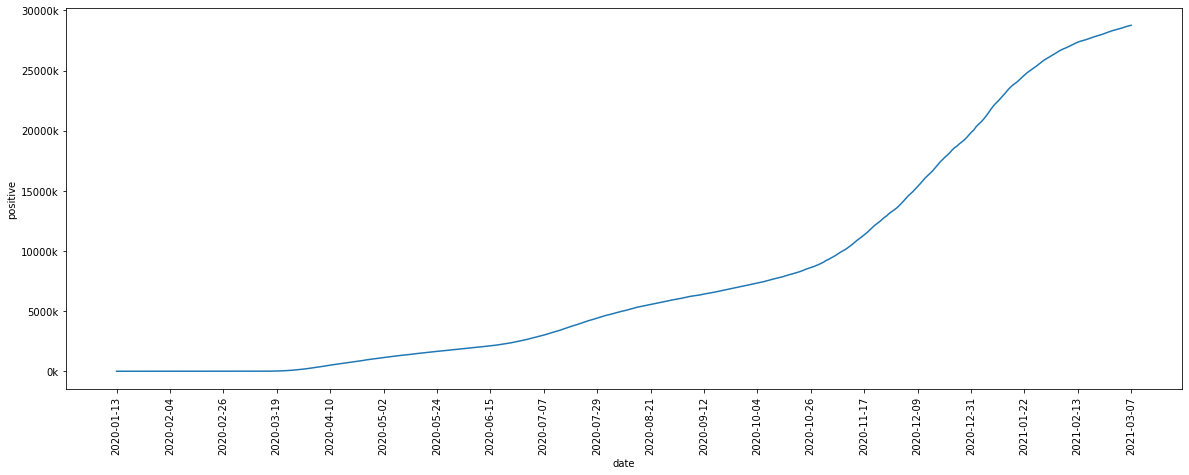

In [573]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize= (20,7))
sns.lineplot(x='date', y= 'positive', data = covidtotals)
a = np.linspace(0,419,20)
plt.xticks(a, rotation = 'vertical')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%dk'))
plt.show()


### Scikit-learn


Importing library

In [574]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

We need to change the dates which are in the form of  ISO 8601 format to float type by estimating the totals of days of each dates so that we can implement the sckit-learn in this case which are Linear and Polynomial regression.

In [575]:
from datetime import datetime
date_to_days = []
for i in range(len(covidtotals.date)):
    t = datetime.fromisoformat(covidtotals.date.values[i])  #coverts str to strftime type
    year = float(t.strftime("%Y"))*365
    month = float(t.strftime("%m"))*30
    day = float(t.strftime("%d"))
    date_to_days.append(year+month+day)

In [576]:
covidtotals["date"] = date_to_days

In [577]:
X=covidtotals[["date"]] # convert 1D-array to 2D-array or use #X_train= X_train.values.reshape(-1, 1)
                                                              #X_test = X_test.values.reshape(-1, 1)
y=covidtotals["positive"]

Dividing the data into 2 parts which are traning data and testing data

In [578]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, random_state=1) # traning set 70% and testing set 30% of data 

### Linear regression

                                                The equation : y = a_0 + a_1*x + ε

In [579]:
Linear_model = LinearRegression()
Linear_model

LinearRegression()

In [580]:
Linear_model.fit(X_train, y_train)

LinearRegression()

In [581]:
Linear_model.score(X_train,y_train) # R-squared of training dataset

0.8383035422143409

In [582]:
Linear_model.coef_ #a_1

array([67.23021512])

In [583]:
Linear_model.intercept_ # a_0

-49577577.508493364

In [584]:
Linear_model.score(X_test,y_test) # R-squared of testing dataset

0.840471340725784

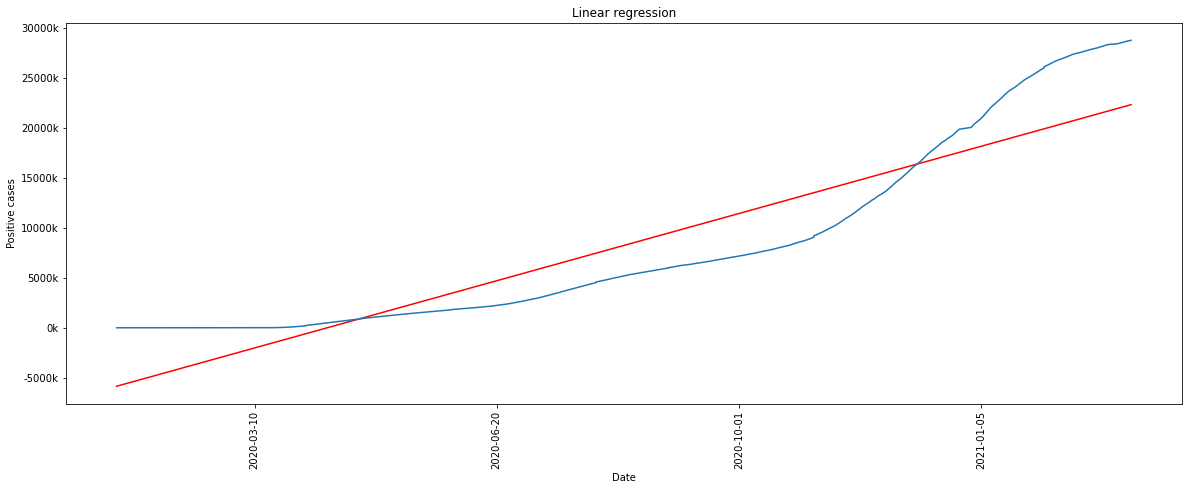

In [585]:
plt.figure(figsize= (20,7))
plt.plot(X, Linear_model.predict(X), color = "red")
plt.plot(X, y)
plt.title("Linear regression")
plt.ylabel("Positive cases")
plt.xlabel("Date")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%dk'))
# To change days xlabel to date xlabel
days = [737400,737500,737600,737700]
date = ['2020-03-10','2020-06-20','2020-10-01','2021-01-05']

plt.xticks(days, date, rotation = "vertical")
plt.show()

From the above figure, we can see that the fitting of linear regression model is not good enough to predict the data due to the non-linear of the data

In [586]:
Linear_model.predict([[737500],[737700]]) # --> date(20-06-2020,05-01-2021)

array([ 4706.14318737, 18152.18621155])

We can see it clearer by indexing some data to see the results from linear regression model, as a result, the value of positive cases of index 737500 and 737700 which are date 20-06-2020 and 05-01-2021 supposed to be around 2.2 millon cases and 21 million cases respectively, but they are  around 4.7 millon cases and 18 million cases.

### Polynomial regression

                    The equation : y = a_0 + a_1*x + a_2*(x^2) + a_3*(x^3) + ... + a_n*(x^n) + ε    ; n= degree

In [587]:
poly_model = PolynomialFeatures(degree=2) # y=a_0+a_1*x+a_2*(x^2)+ε 

In [588]:
poly_model.fit_transform([[5]]) # it means that with degree = 2 , the fit_transform process is that there will have 3(number of degrees + 1 ) values inside the array and the first one is 5 to the power of 0 /
                                # the second value comes from 5 to the power of 2 and the last one is 5 to the power of 3.

array([[ 1.,  5., 25.]])

In [589]:
X_train[:3]

,date
337,737424.0
34,737726.0
233,737527.0


In [590]:
X_train_poly = poly_model.fit_transform(X_train)
X_test_poly  = poly_model.transform(X_test)

In [591]:
Lr = LinearRegression()

In [592]:
Lr.fit(X_train_poly, y_train)

LinearRegression()

In [593]:
Lr.score(X_train_poly, y_train) #R-squared of trainging data

0.9854851111664827

Obviously, R-squared from polynomial model, which is around 98 percent, is higher than linear regression model which is only around 84 percent.

In [594]:
Lr.intercept_ # a_0

140440633988.7145

In [595]:
Lr.coef_ #[Nan, a_1,a_2]

array([ 0.00000000e+00, -3.80897578e+05,  2.58263866e-01])

In [596]:
Lr.score(X_test_poly, y_test) # R-squared of testing dataset

0.9854383426626103

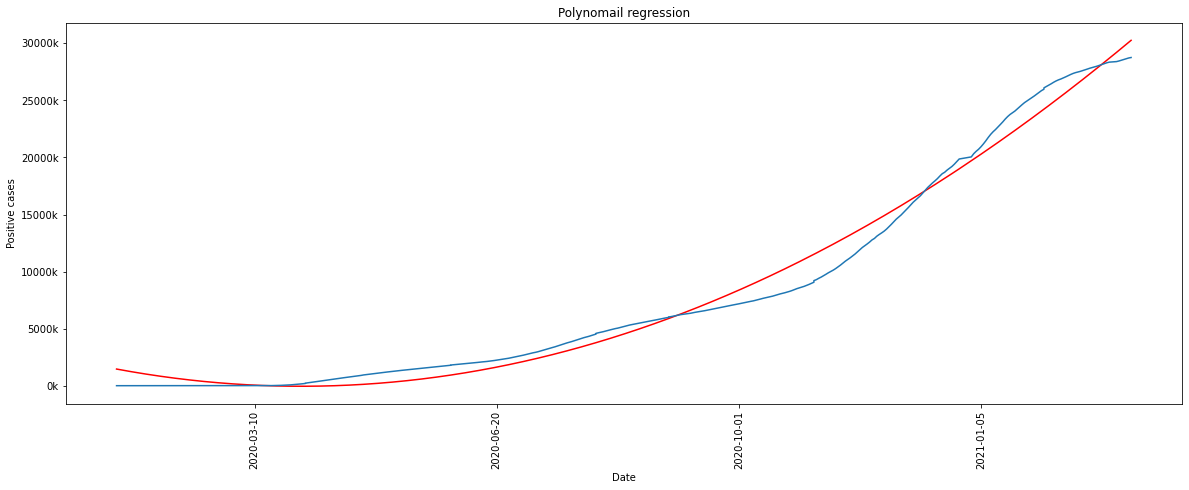

In [597]:
plt.figure(figsize= (20,7))
plt.plot(X, Lr.predict(poly_model.fit_transform(X)), color = "red")
plt.plot(X, y)
plt.title("Polynomail regression")
plt.ylabel("Positive cases")
plt.xlabel("Date")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%dk'))
# To change days to date 
days = [737400,737500,737600,737700]
date = ['2020-03-10','2020-06-20','2020-10-01','2021-01-05']

plt.xticks(days, date, rotation = "vertical")
plt.show()

From the above figure, the polynomial regression model is far better than the linear regression model because the fitting of polynomial regression in the graph is very close to the normal line.  

In [598]:
Lr.predict(poly_model.fit_transform([[737500],[737700]])) # --> date(20-06-2020,05-1-2021))) # --> date(20-06-2020,05-1-2021)

array([ 1628.46380615, 20284.09188843])

As we can see, in the same index of date the values from polynomial regression model are nearly matched to the non-linear data. For the date of 20-06-2020 and 05-01-2020 which are around 2.2 millon cases and 21 million cases respectively, and the values are around 1.6 million cases and 20 million cases by using the polynomial regression model. Therefore, in this case we should use polynomial regression model than linear regression model.

### Comparison between Linear regression and Polynomial regression model

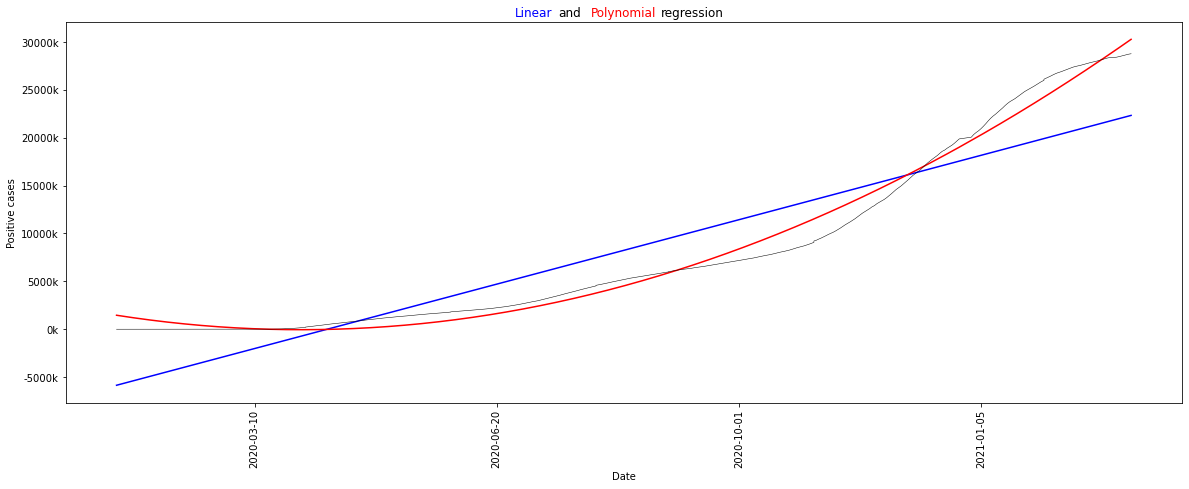

In [599]:
plt.figure(figsize= (20,7))

fig1 = plt.figure(1)
fig1.text(0.45, 0.885, "Linear", ha="center", va="bottom", size="large",color="blue")
fig1.text(0.475, 0.885, "and", ha="center", va="bottom", size="large")
fig1.text(0.512,0.885,"Polynomial", ha="center", va="bottom", size="large",color="red")
fig1.text(0.56,0.885, "regression", ha="center", va="bottom", size="large")

plt.plot(X, Linear_model.predict(X), color = "blue")
plt.plot(X, Lr.predict(poly_model.fit_transform(X)), color = "red")
plt.plot(X, y, color = "black", linewidth=0.5)
plt.ylabel("Positive cases")
plt.xlabel("Date")
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%dk'))
# To change days to date 
days = [737400,737500,737600,737700]
date = ['2020-03-10','2020-06-20','2020-10-01','2021-01-05']

plt.xticks(days, date, rotation = "vertical")
plt.show()

In conclusion, for the non-linear data outputs, we should to use polynomial regression than linear regression model for fitting the data.

---
#### Thank you for reading, this is about my project that I try using the sckit-learn for improving skill as data scientist 